# About the Competition
* https://www.kaggle.com/competitions/titanic

# Setup

In [396]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [397]:
# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Machine Learning
import catboost
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool, cv
from sklearn.model_selection import GridSearchCV

# Importing Datasets

In [398]:
df_train = pd.read_csv('data/train.csv')
df_val = pd.read_csv('data/test.csv')

In [399]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [400]:
df_val

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


# EDA

In [401]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [402]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [403]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [404]:
df_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [405]:
df_val.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [406]:
df_val.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [407]:
passengerId = df_val['PassengerId']

df_titanic = df_train.append(df_val, ignore_index = True)

C:\Users\yrbel\AppData\Local\Temp\ipykernel_7308\2148821873.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_titanic = df_train.append(df_val, ignore_index = True)


In [408]:
train_index = len(df_train)
val_index = len(df_titanic) - len(df_val)

In [409]:
df_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [410]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [411]:
df_titanic.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [412]:
df_titanic.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [413]:
df = pd.DataFrame()

## Survived

In [414]:
df_titanic['Survived'].nunique()

2

In [415]:
df_titanic['Survived'].unique()

array([ 0.,  1., nan])

In [416]:
df_titanic['Survived'].isnull().sum()

418

In [417]:
df_titanic['Survived'].value_counts()

0.0    549
1.0    342
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

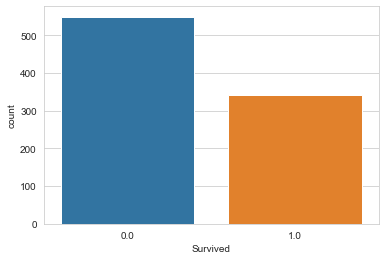

In [418]:
sns.countplot(data=df_titanic,
             x='Survived')

In [419]:
# a function to summarize the above informations
def explore_titanic(data, col, graph='countplot'):
    '''
    Parameters: data=dataframe, col=column, graph='countplot'/'displot'
    Return: 
        - count of unique values
        - unique values
        - count of null values
        - count of each type of value
        - countplot or distplot graphic
    '''
    print(f'Count of unique values: {data[col].nunique()}')
    print(f'\nUnique values: {data[col].unique()}')
    print(f'\nCount of null values: {data[col].isnull().sum()}')
    print(f'\nCount of each type of value: \n{data[col].value_counts()}')
    
    if graph == 'countplot':
        sns.countplot(data=data, x=col, hue='Survived')
    else:
        sns.displot(data[col], kde=True)

Count of unique values: 2

Unique values: [ 0.  1. nan]

Count of null values: 418

Count of each type of value: 
0.0    549
1.0    342
Name: Survived, dtype: int64


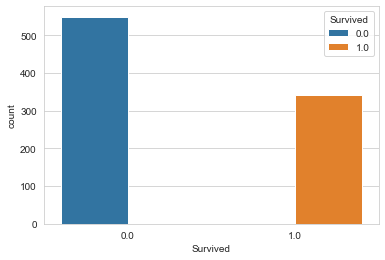

In [420]:
explore_titanic(df_titanic, 'Survived')

In [421]:
df['Survived'] = df_titanic['Survived']

In [422]:
df

,Survived
0,0.0
1,1.0
2,1.0
3,1.0
4,0.0
...,...
1304,NaN
1305,NaN
1306,NaN
1307,NaN


## Pclass - Ticket class

Count of unique values: 3

Unique values: [3 1 2]

Count of null values: 0

Count of each type of value: 
3    709
1    323
2    277
Name: Pclass, dtype: int64


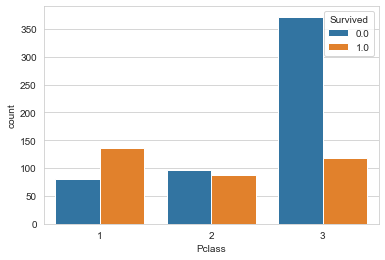

In [423]:
explore_titanic(df_titanic, 'Pclass')

In [424]:
df['Pclass'] = df_titanic['Pclass']

In [425]:
df

,Survived,Pclass
0,0.0,3
1,1.0,1
2,1.0,3
3,1.0,1
4,0.0,3
...,...,...
1304,NaN,3
1305,NaN,1
1306,NaN,3
1307,NaN,3


## Sex

In [426]:
#other option: df_titanic['Sex'].map({'female':1, 'male':0})
df_titanic['Sex'] = df_titanic['Sex'].replace(['male', 'female'], [0, 1])

Count of unique values: 2

Unique values: [0 1]

Count of null values: 0

Count of each type of value: 
0    843
1    466
Name: Sex, dtype: int64


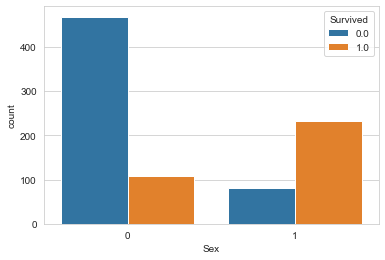

In [427]:
explore_titanic(df_titanic, 'Sex')

In [428]:
df['Sex'] = df_titanic['Sex']
df

,Survived,Pclass,Sex
0,0.0,3,0
1,1.0,1,1
2,1.0,3,1
3,1.0,1,1
4,0.0,3,0
...,...,...,...
1304,NaN,3,0
1305,NaN,1,1
1306,NaN,3,0
1307,NaN,3,0


## Age

Count of unique values: 98

Unique values: [22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.   22.5  18.5  67.   76.   26.5  60.5  11.5
  0.33  0.17 38.5 ]

Count of null values: 263

Count of each type of value: 
24.0    47
22.0    43
21.0    41
30.0    40
18.0    39
        ..
23.5     1
70.5     1
55.5     1
20.5     1
38.5     1
Name: Age, Length: 98, dtype: int64


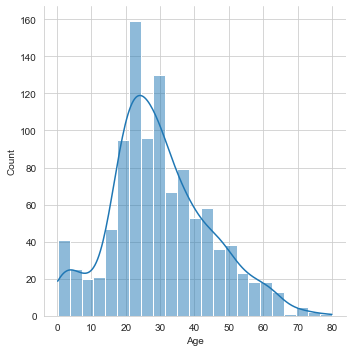

In [429]:
explore_titanic(df_titanic, 'Age', 'displot')

In [430]:
df_titanic['Age'].mean()

29.881137667304014

In [431]:
df_titanic.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.038354,-0.013406,0.028814,-0.055224,0.008942,0.031428
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.038354,-0.338481,1.000000,-0.124617,-0.408106,0.060832,0.018322,-0.558629
Sex,-0.013406,0.543351,-0.124617,1.000000,-0.063645,0.109609,0.213125,0.185523
Age,0.028814,-0.077221,-0.408106,-0.063645,1.000000,-0.243699,-0.150917,0.178740
SibSp,-0.055224,-0.035322,0.060832,0.109609,-0.243699,1.000000,0.373587,0.160238
Parch,0.008942,0.081629,0.018322,0.213125,-0.150917,0.373587,1.000000,0.221539
Fare,0.031428,0.257307,-0.558629,0.185523,0.178740,0.160238,0.221539,1.000000


In [432]:
for Pclass in sorted(df_titanic['Pclass'].unique()):
    if Pclass == 1:
        sufix = 'st'
    elif Pclass == 2:
        sufix = 'nd'
    elif Pclass == 3:
        sufix = 'rd'
    print(f"Mean age of the people in {Pclass}{sufix} class: {df_titanic[df_titanic['Pclass'] == Pclass]['Age'].mean():.2f}")

Mean age of the people in 1st class: 39.16
Mean age of the people in 2nd class: 29.51
Mean age of the people in 3rd class: 24.82


In [433]:
df_titanic['Age'].isnull().sum()

263

In [434]:
# filling the Age's null values depending on Pclass
#for i in df_titanic.index:
#    if pd.isnull(df_titanic['Age'][i]):
#        if df_titanic['Pclass'][i] == 1:
#            df_titanic['Age'][i] = round(df_titanic[df_titanic['Pclass'] == 1]['Age'].mean())
#        elif df_titanic['Pclass'][i] == 2:
#            df_titanic['Age'][i] = round(df_titanic[df_titanic['Pclass'] == 2]['Age'].mean())
#        elif df_titanic['Pclass'][i] == 3:
#            df_titanic['Age'][i] = round(df_titanic[df_titanic['Pclass'] == 3]['Age'].mean())
#    else:
#        continue
## better way
df_titanic['Age'] = df_titanic['Age'].fillna(df_titanic.groupby('Pclass')['Age'].transform('mean').round())

In [435]:
df_titanic['Age'].isnull().sum()

0

In [436]:
df_titanic.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [437]:
df['Age'] = df_titanic['Age']

In [438]:
df

,Survived,Pclass,Sex,Age
0,0.0,3,0,22.0
1,1.0,1,1,38.0
2,1.0,3,1,26.0
3,1.0,1,1,35.0
4,0.0,3,0,35.0
...,...,...,...,...
1304,NaN,3,0,25.0
1305,NaN,1,1,39.0
1306,NaN,3,0,38.5
1307,NaN,3,0,25.0


## SibSp - Number of siblings / spouses aboard the Titanic 	

Count of unique values: 7

Unique values: [1 0 3 4 2 5 8]

Count of null values: 0

Count of each type of value: 
0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: SibSp, dtype: int64


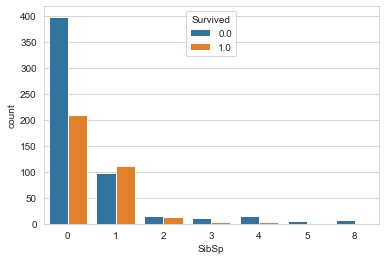

In [439]:
explore_titanic(df_titanic, 'SibSp')

In [440]:
df['SibSp'] = df_titanic['SibSp']

## Parch - Number of parents / children aboard the Titanic 	

Count of unique values: 8

Unique values: [0 1 2 5 3 4 6 9]

Count of null values: 0

Count of each type of value: 
0    1002
1     170
2     113
3       8
5       6
4       6
6       2
9       2
Name: Parch, dtype: int64


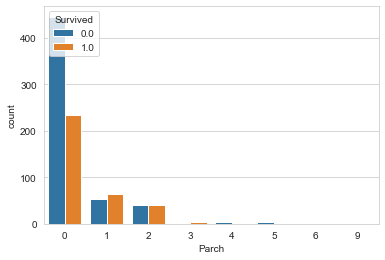

In [441]:
explore_titanic(df_titanic, 'Parch')

In [442]:
df['Parch'] = df_titanic['Parch']

## Ticket

Count of unique values: 929

Unique values: ['A/5 21171' 'PC 17599' 'STON/O2. 3101282' '113803' '373450' '330877'
 '17463' '349909' '347742' '237736' 'PP 9549' '113783' 'A/5. 2151'
 '347082' '350406' '248706' '382652' '244373' '345763' '2649' '239865'
 '248698' '330923' '113788' '347077' '2631' '19950' '330959' '349216'
 'PC 17601' 'PC 17569' '335677' 'C.A. 24579' 'PC 17604' '113789' '2677'
 'A./5. 2152' '345764' '2651' '7546' '11668' '349253' 'SC/Paris 2123'
 '330958' 'S.C./A.4. 23567' '370371' '14311' '2662' '349237' '3101295'
 'A/4. 39886' 'PC 17572' '2926' '113509' '19947' 'C.A. 31026' '2697'
 'C.A. 34651' 'CA 2144' '2669' '113572' '36973' '347088' 'PC 17605' '2661'
 'C.A. 29395' 'S.P. 3464' '3101281' '315151' 'C.A. 33111' 'S.O.C. 14879'
 '2680' '1601' '348123' '349208' '374746' '248738' '364516' '345767'
 '345779' '330932' '113059' 'SO/C 14885' '3101278' 'W./C. 6608'
 'SOTON/OQ 392086' '343275' '343276' '347466' 'W.E.P. 5734' 'C.A. 2315'
 '364500' '374910' 'PC 17754' 'PC 17759' '2

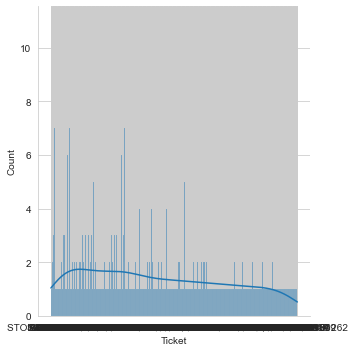

In [443]:
explore_titanic(df_titanic, 'Ticket', 'displot')

In [444]:
df_titanic[df_titanic['Ticket'] == 'CA. 2343']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0.0,3,"Sage, Master. Thomas Henry",0,25.0,8,2,CA. 2343,69.55,NaN,S
180,181,0.0,3,"Sage, Miss. Constance Gladys",1,25.0,8,2,CA. 2343,69.55,NaN,S
201,202,0.0,3,"Sage, Mr. Frederick",0,25.0,8,2,CA. 2343,69.55,NaN,S
324,325,0.0,3,"Sage, Mr. George John Jr",0,25.0,8,2,CA. 2343,69.55,NaN,S
792,793,0.0,3,"Sage, Miss. Stella Anna",1,25.0,8,2,CA. 2343,69.55,NaN,S
846,847,0.0,3,"Sage, Mr. Douglas Bullen",0,25.0,8,2,CA. 2343,69.55,NaN,S
863,864,0.0,3,"Sage, Miss. Dorothy Edith ""Dolly""",1,25.0,8,2,CA. 2343,69.55,NaN,S
1079,1080,NaN,3,"Sage, Miss. Ada",1,25.0,8,2,CA. 2343,69.55,NaN,S
1233,1234,NaN,3,"Sage, Mr. John George",0,25.0,1,9,CA. 2343,69.55,NaN,S
1251,1252,NaN,3,"Sage, Master. William Henry",0,14.5,8,2,CA. 2343,69.55,NaN,S


In [445]:
df_titanic[df_titanic['Ticket'] == 'CA 2144']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
59,60,0.0,3,"Goodwin, Master. William Frederick",0,11.0,5,2,CA 2144,46.9,NaN,S
71,72,0.0,3,"Goodwin, Miss. Lillian Amy",1,16.0,5,2,CA 2144,46.9,NaN,S
386,387,0.0,3,"Goodwin, Master. Sidney Leonard",0,1.0,5,2,CA 2144,46.9,NaN,S
480,481,0.0,3,"Goodwin, Master. Harold Victor",0,9.0,5,2,CA 2144,46.9,NaN,S
678,679,0.0,3,"Goodwin, Mrs. Frederick (Augusta Tyler)",1,43.0,1,6,CA 2144,46.9,NaN,S
683,684,0.0,3,"Goodwin, Mr. Charles Edward",0,14.0,5,2,CA 2144,46.9,NaN,S
1030,1031,NaN,3,"Goodwin, Mr. Charles Frederick",0,40.0,1,6,CA 2144,46.9,NaN,S
1031,1032,NaN,3,"Goodwin, Miss. Jessie Allis",1,10.0,5,2,CA 2144,46.9,NaN,S


In [369]:
df_titanic[df_titanic['Ticket'] == 'S.O.C. 14879']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
72,73,0.0,2,"Hood, Mr. Ambrose Jr",0,21.0,0,0,S.O.C. 14879,73.5,NaN,S
120,121,0.0,2,"Hickman, Mr. Stanley George",0,21.0,2,0,S.O.C. 14879,73.5,NaN,S
385,386,0.0,2,"Davies, Mr. Charles Henry",0,18.0,0,0,S.O.C. 14879,73.5,NaN,S
655,656,0.0,2,"Hickman, Mr. Leonard Mark",0,24.0,2,0,S.O.C. 14879,73.5,NaN,S
665,666,0.0,2,"Hickman, Mr. Lewis",0,32.0,2,0,S.O.C. 14879,73.5,NaN,S
1103,1104,NaN,2,"Deacon, Mr. Percy William",0,17.0,0,0,S.O.C. 14879,73.5,NaN,S
1243,1244,NaN,2,"Dibden, Mr. William",0,18.0,0,0,S.O.C. 14879,73.5,NaN,S


In [370]:
df_titanic[df_titanic['Ticket'] == '323592']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
470,471,0.0,3,"Keefe, Mr. Arthur",0,25.0,0,0,323592,7.25,NaN,S


In [371]:
# I consider to discard the 'Ticket' feature because I can't see any important relationship with the ticket number
# and the others features

# The only relationship I can see is the ticket number with the embark location and Family Size, but it's not enough
# to use this data in the machine learning model

## Fare

Count of unique values: 281

Unique values: [  7.25    71.2833   7.925   53.1      8.05     8.4583  51.8625  21.075
  11.1333  30.0708  16.7     26.55    31.275    7.8542  16.      29.125
  13.      18.       7.225   26.       8.0292  35.5     31.3875 263.
   7.8792   7.8958  27.7208 146.5208   7.75    10.5     82.1708  52.
   7.2292  11.2417   9.475   21.      41.5792  15.5     21.6792  17.8
  39.6875   7.8     76.7292  61.9792  27.75    46.9     80.      83.475
  27.9     15.2458   8.1583   8.6625  73.5     14.4542  56.4958   7.65
  29.      12.475    9.       9.5      7.7875  47.1     15.85    34.375
  61.175   20.575   34.6542  63.3583  23.      77.2875   8.6542   7.775
  24.15     9.825   14.4583 247.5208   7.1417  22.3583   6.975    7.05
  14.5     15.0458  26.2833   9.2167  79.2      6.75    11.5     36.75
   7.7958  12.525   66.6      7.3125  61.3792   7.7333  69.55    16.1
  15.75    20.525   55.      25.925   33.5     30.6958  25.4667  28.7125
   0.      15.05    39.      22.

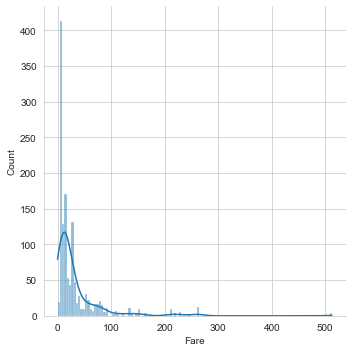

In [372]:
explore_titanic(df_titanic, 'Fare', 'displot')

In [373]:
# who's the passenger has the 'Fare' feature null?
df_titanic[df_titanic['Fare'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1043,1044,NaN,3,"Storey, Mr. Thomas",0,60.5,0,0,3701,NaN,NaN,S


In [374]:
# I'll fill this null value with the 'Pclass' mean
df_titanic['Fare'].fillna(round(df_titanic[df_titanic['Pclass'] == 3]['Fare'].mean()), inplace=True)

In [375]:
df_titanic['Fare'].isnull().sum()

0

In [376]:
df_titanic.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          2
dtype: int64

In [377]:
df['Fare'] = df_titanic['Fare']

In [378]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0.0,3,0,22.0,1,0,7.2500
1,1.0,1,1,38.0,1,0,71.2833
2,1.0,3,1,26.0,0,0,7.9250
3,1.0,1,1,35.0,1,0,53.1000
4,0.0,3,0,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
1304,NaN,3,0,25.0,0,0,8.0500
1305,NaN,1,1,39.0,0,0,108.9000
1306,NaN,3,0,38.5,0,0,7.2500
1307,NaN,3,0,25.0,0,0,8.0500


## Cabin

In [379]:
df_titanic['Cabin'].isnull().sum()

1014

In [380]:
# percentage of null values in the feature 'Cabin'
df_titanic['Cabin'].isnull().sum()/len(df_titanic)*100

77.46371275783041

In [381]:
# considering this null rate, I decide to not use this feature 'Cabin' in the machine learning dataframe

## Embarked

Count of unique values: 3

Unique values: ['S' 'C' 'Q' nan]

Count of null values: 2

Count of each type of value: 
S    914
C    270
Q    123
Name: Embarked, dtype: int64


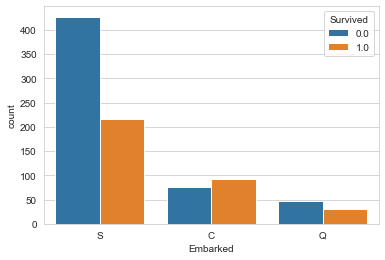

In [382]:
explore_titanic(df_titanic, 'Embarked')

In [383]:
# survived rate in the 'S' embark
df_titanic[df_titanic['Embarked'] == 'S']['Survived'].mean()

0.33695652173913043

In [384]:
# 'Pclass' rate in the 'S' embark
df_titanic[df_titanic['Embarked'] == 'S']['Pclass'].mean()

2.3479212253829322

In [385]:
# survived rate in the 'C' embark
df_titanic[df_titanic['Embarked'] == 'C']['Survived'].mean()

0.5535714285714286

In [386]:
# 'Pclass' rate in the 'C' embark
df_titanic[df_titanic['Embarked'] == 'C']['Pclass'].mean()

1.8518518518518519

In [387]:
# survived rate in the 'Q' embark
df_titanic[df_titanic['Embarked'] == 'Q']['Survived'].mean()

0.38961038961038963

In [388]:
# survived rate in the 'Q' embark
df_titanic[df_titanic['Embarked'] == 'Q']['Pclass'].mean()

2.894308943089431

In [389]:
df_titanic[df_titanic['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1.0,1,"Icard, Miss. Amelie",1,38.0,0,0,113572,80.0,B28,NaN
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",1,62.0,0,0,113572,80.0,B28,NaN


In [390]:
# considering the 'Pclass' of this two passengers is '1', the 'Ticket' value is the same (high), the 'Cabin' is the same
# and both survived, I'll fill the 'Embarked' feature with 'C' (considering the analysis above)
df_titanic['Embarked'].fillna('C', inplace=True)

In [391]:
df_titanic.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
dtype: int64

In [392]:
df['Embarked'] = df_titanic['Embarked']

In [393]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3,0,22.0,1,0,7.2500,S
1,1.0,1,1,38.0,1,0,71.2833,C
2,1.0,3,1,26.0,0,0,7.9250,S
3,1.0,1,1,35.0,1,0,53.1000,S
4,0.0,3,0,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
1304,NaN,3,0,25.0,0,0,8.0500,S
1305,NaN,1,1,39.0,0,0,108.9000,C
1306,NaN,3,0,38.5,0,0,7.2500,S
1307,NaN,3,0,25.0,0,0,8.0500,S


# Feature Engineering

## Family Size - 'SibSp' + 'Parch' + 1 (the passenger)

In [394]:
df_titanic['FamilySize'] = df_titanic['SibSp'] + df_titanic['Parch'] + 1

In [395]:
df['FamilySize'] = df_titanic['FamilySize']

## Extract the person title from the feature 'Name'

In [ ]:
df_titanic['Name']

In [ ]:
# lambda function
df_titanic['Title'] = df_titanic['Name'].apply(lambda name: name.split(',')[1].split('.')[0].strip())

# list comprehension
# df_titanic['Title'] = [df_titanic['Name'][name].split(',')[1].split('.')[0].strip() for name in df_titanic.index]

In [ ]:
df_titanic['Title'].nunique()

In [ ]:
df_titanic['Title'].unique()

In [ ]:
df_titanic['Title'].value_counts()

In [ ]:
df_titanic['Title'] = [title if title in ['Mr', 'Miss', 'Mrs', 'Master'] else 'Person' for title in df_titanic['Title']]

In [ ]:
df_titanic['Title'].value_counts()

In [ ]:
df['Title'] = df_titanic['Title']
df

In [ ]:
explore_titanic(df_titanic, 'Title')

# Preprocessing

In [ ]:
df

## Get Dummies

In [ ]:
pclass = pd.get_dummies(df['Pclass'], prefix='Pclass', drop_first=True)
title = pd.get_dummies(df['Title'], prefix='Title', drop_first=True)
embarked = pd.get_dummies(df['Embarked'], prefix='Embarked', drop_first=True)

In [ ]:
titanic_dummies = pd.concat([df, pclass, title, embarked], axis=1)

In [ ]:
titanic_dummies.drop(['Pclass', 'Title', 'Embarked'], axis=1, inplace=True)

In [ ]:
titanic_dummies

## Recreate df_train and df_val

In [ ]:
df_train = titanic_dummies[:train_index]
df_val = titanic_dummies[val_index:]

In [ ]:
df_train

In [ ]:
df_val

In [ ]:
df_train['Survived'] = df_train['Survived'].astype(int)

# Machine Learning

In [ ]:
X, y = df_train.drop('Survived', axis=1), df_train['Survived']

In [ ]:
X_val = df_val.drop('Survived', axis=1)

## Modeling

In [ ]:
def calc_accuracy(algorithm, X_train, y_train, CV):
    model = algorithm.fit(X_train, y_train)
    acc = round(model.score(X_train, y_train)*100, 2)
    
    train_pred = model_selection.cross_val_predict(algorithm, X_train, y_train, cv=CV, n_jobs=-1)
    acc_CV = round(metrics.accuracy_score(y_train, train_pred)*100, 2)
    
    return acc, acc_CV

### Random Forest

In [ ]:
acc_rf, acc_cv_rf = calc_accuracy(RandomForestClassifier(), X, y, 10)

print(f'Accuracy: {acc_rf}%')
print(f'Cross Validation Accuracy: {acc_cv_rf}%')

### Logistic Regression

In [ ]:
acc_lr, acc_cv_lr = calc_accuracy(LogisticRegression(max_iter=1000), X, y, 10)

print(f'Accuracy: {acc_lr}%')
print(f'Cross Validation Accuracy: {acc_cv_lr}%')

### K-Nearest Neighbors

In [ ]:
acc_knn, acc_cv_knn = calc_accuracy(KNeighborsClassifier(), X, y, 10)

print(f'Accuracy: {acc_knn}%')
print(f'Cross Validation Accuracy: {acc_cv_knn}%')

### Gaussian Naive Bayes

In [ ]:
acc_gaussian, acc_cv_gaussian = calc_accuracy(GaussianNB(), X, y, 10)

print(f'Accuracy: {acc_gaussian}%')
print(f'Cross Validation Accuracy: {acc_cv_gaussian}%')

### Linear Support Vector Machines (SVC)

In [ ]:
acc_svc, acc_cv_svc = calc_accuracy(LinearSVC(dual=False), X, y, 10)

print(f'Accuracy: {acc_svc}%')
print(f'Cross Validation Accuracy: {acc_cv_svc}%')

### Stochastic Gradient Descent

In [ ]:
acc_sgd, acc_cv_sgd = calc_accuracy(SGDClassifier(), X, y, 10)

print(f'Accuracy: {acc_sgd}%')
print(f'Cross Validation Accuracy: {acc_cv_sgd}%')

### Decision Tree Classifier

In [ ]:
acc_tree, acc_cv_tree = calc_accuracy(DecisionTreeClassifier(), X, y, 10)

print(f'Accuracy: {acc_tree}%')
print(f'Cross Validation Accuracy: {acc_cv_tree}%')

### Gradient Boost Classifier

In [ ]:
acc_gbc, acc_cv_gbc = calc_accuracy(GradientBoostingClassifier(), X, y, 10)

print(f'Accuracy: {acc_gbc}%')
print(f'Cross Validation Accuracy: {acc_cv_gbc}%')

### Summarized Accuracies

In [ ]:
print('Random Forest Classifier')
print(f'Accuracy: {acc_rf}%')
print(f'Cross Validation Accuracy: {acc_cv_rf}%\n')
print('Linear Regression')
print(f'Accuracy: {acc_lr}%')
print(f'Cross Validation Accuracy: {acc_cv_lr}%\n')
print('K-Nearest Neighbors')
print(f'Accuracy: {acc_knn}%')
print(f'Cross Validation Accuracy: {acc_cv_knn}%\n')
print('Gaussian Naive Bayes')
print(f'Accuracy: {acc_gaussian}%')
print(f'Cross Validation Accuracy: {acc_cv_gaussian}%\n')
print('Support Vector Machine')
print(f'Accuracy: {acc_svc}%')
print(f'Cross Validation Accuracy: {acc_cv_svc}%\n')
print('Stochastic Gradient Descent')
print(f'Accuracy: {acc_sgd}%')
print(f'Cross Validation Accuracy: {acc_cv_sgd}%\n')
print('Desissions Tree Classifier')
print(f'Accuracy: {acc_tree}%')
print(f'Cross Validation Accuracy: {acc_cv_tree}%\n')
print('Gradient Boost Classifier')
print(f'Accuracy: {acc_gbc}%')
print(f'Cross Validation Accuracy: {acc_cv_gbc}%\n')

In [ ]:
# the better modeling until now is Gradient Boost Trees with the following Cross Validation Accuracy
print(f'{acc_cv_gbt}%')

## Hyperparameter

In [ ]:
params = dict(
    max_depth=[n for n in range(1, 5)],
    min_samples_split=[n for n in range(2, 6)],
    min_samples_leaf=[n for n in range(2, 6)],
    n_estimators=[n for n in range(10, 50, 10)]
)

In [ ]:
gbc = GradientBoostingClassifier()

In [ ]:
# using GridSearchCV
gbc_cv = GridSearchCV(estimator=gbc, param_grid=params, cv=10)

In [ ]:
gbc_cv.fit(X, y)

In [ ]:
print(f'Best score: {gbc_cv.best_score_}')
print(f'Best Parameters: {gbc_cv.best_estimator_}')

# Testing with the Validation Dataset

In [ ]:
gradientBoostingClassifier_pred = gbc_cv.predict(X_val)

In [ ]:
kaggle = pd.DataFrame({'PassengerId': passengerId, 'Survived': gradientBoostingClassifier_pred})

In [ ]:
kaggle.to_csv('submission/Titanic_Gradient_Boosting_pred.csv', index=False)

#### Kaggle Score: 0.77751